In [2]:
## Import Python libraries ## 

import numpy as np
import xsimlab as xs
import matplotlib.pyplot as plt
import xarray as xr


%matplotlib inline
%reload_ext xsimlab.ipython


import fastscape

from orographic_precipitation.fastscape_ext import precip_model
from fastscape.processes import Bedrock


In [3]:
print('xarray-simlab version: ', xs.__version__)
print('fastscape version: ', fastscape.__version__)

xarray-simlab version:  0.5.0
fastscape version:  0.1.0


In [4]:
## Build xarray-simlab model ##
SouthernAndesLEM = precip_model.drop_processes(['init_topography'])
SouthernAndesLEM = SouthernAndesLEM.update_processes({'bedrock': Bedrock})

SouthernAndesLEM

<xsimlab.Model (17 processes, 26 inputs)>
grid
    shape                  [in] ('shape_yx',) nb. of grid nodes in ...
    length                 [in] ('shape_yx',) total grid length in ...
boundary
    status                 [in] () or ('border',) node status at bo...
fs_context
uplift
    rate                   [in] () or ('y', 'x') uplift rate
tectonics
surf2erode
diffusion
    diffusivity            [in] () or ('y', 'x') diffusivity (trans...
init_erosion
flow
orographic
    lapse_rate             [in] environmental lapse rate
    lapse_rate_m           [in] moist adiabatic lapse rate
    ref_density            [in] reference saturation water vapor de...
    latitude               [in] latitude
    precip_base            [in] () or ('y', 'x') background, non-or...
    rainfall_frequency  [inout] daily rainfall frequency
    wind_speed             [in] wind speed
    wind_dir               [in] wind direction (azimuth)
    conv_time              [in] conversion time
    fall_time    

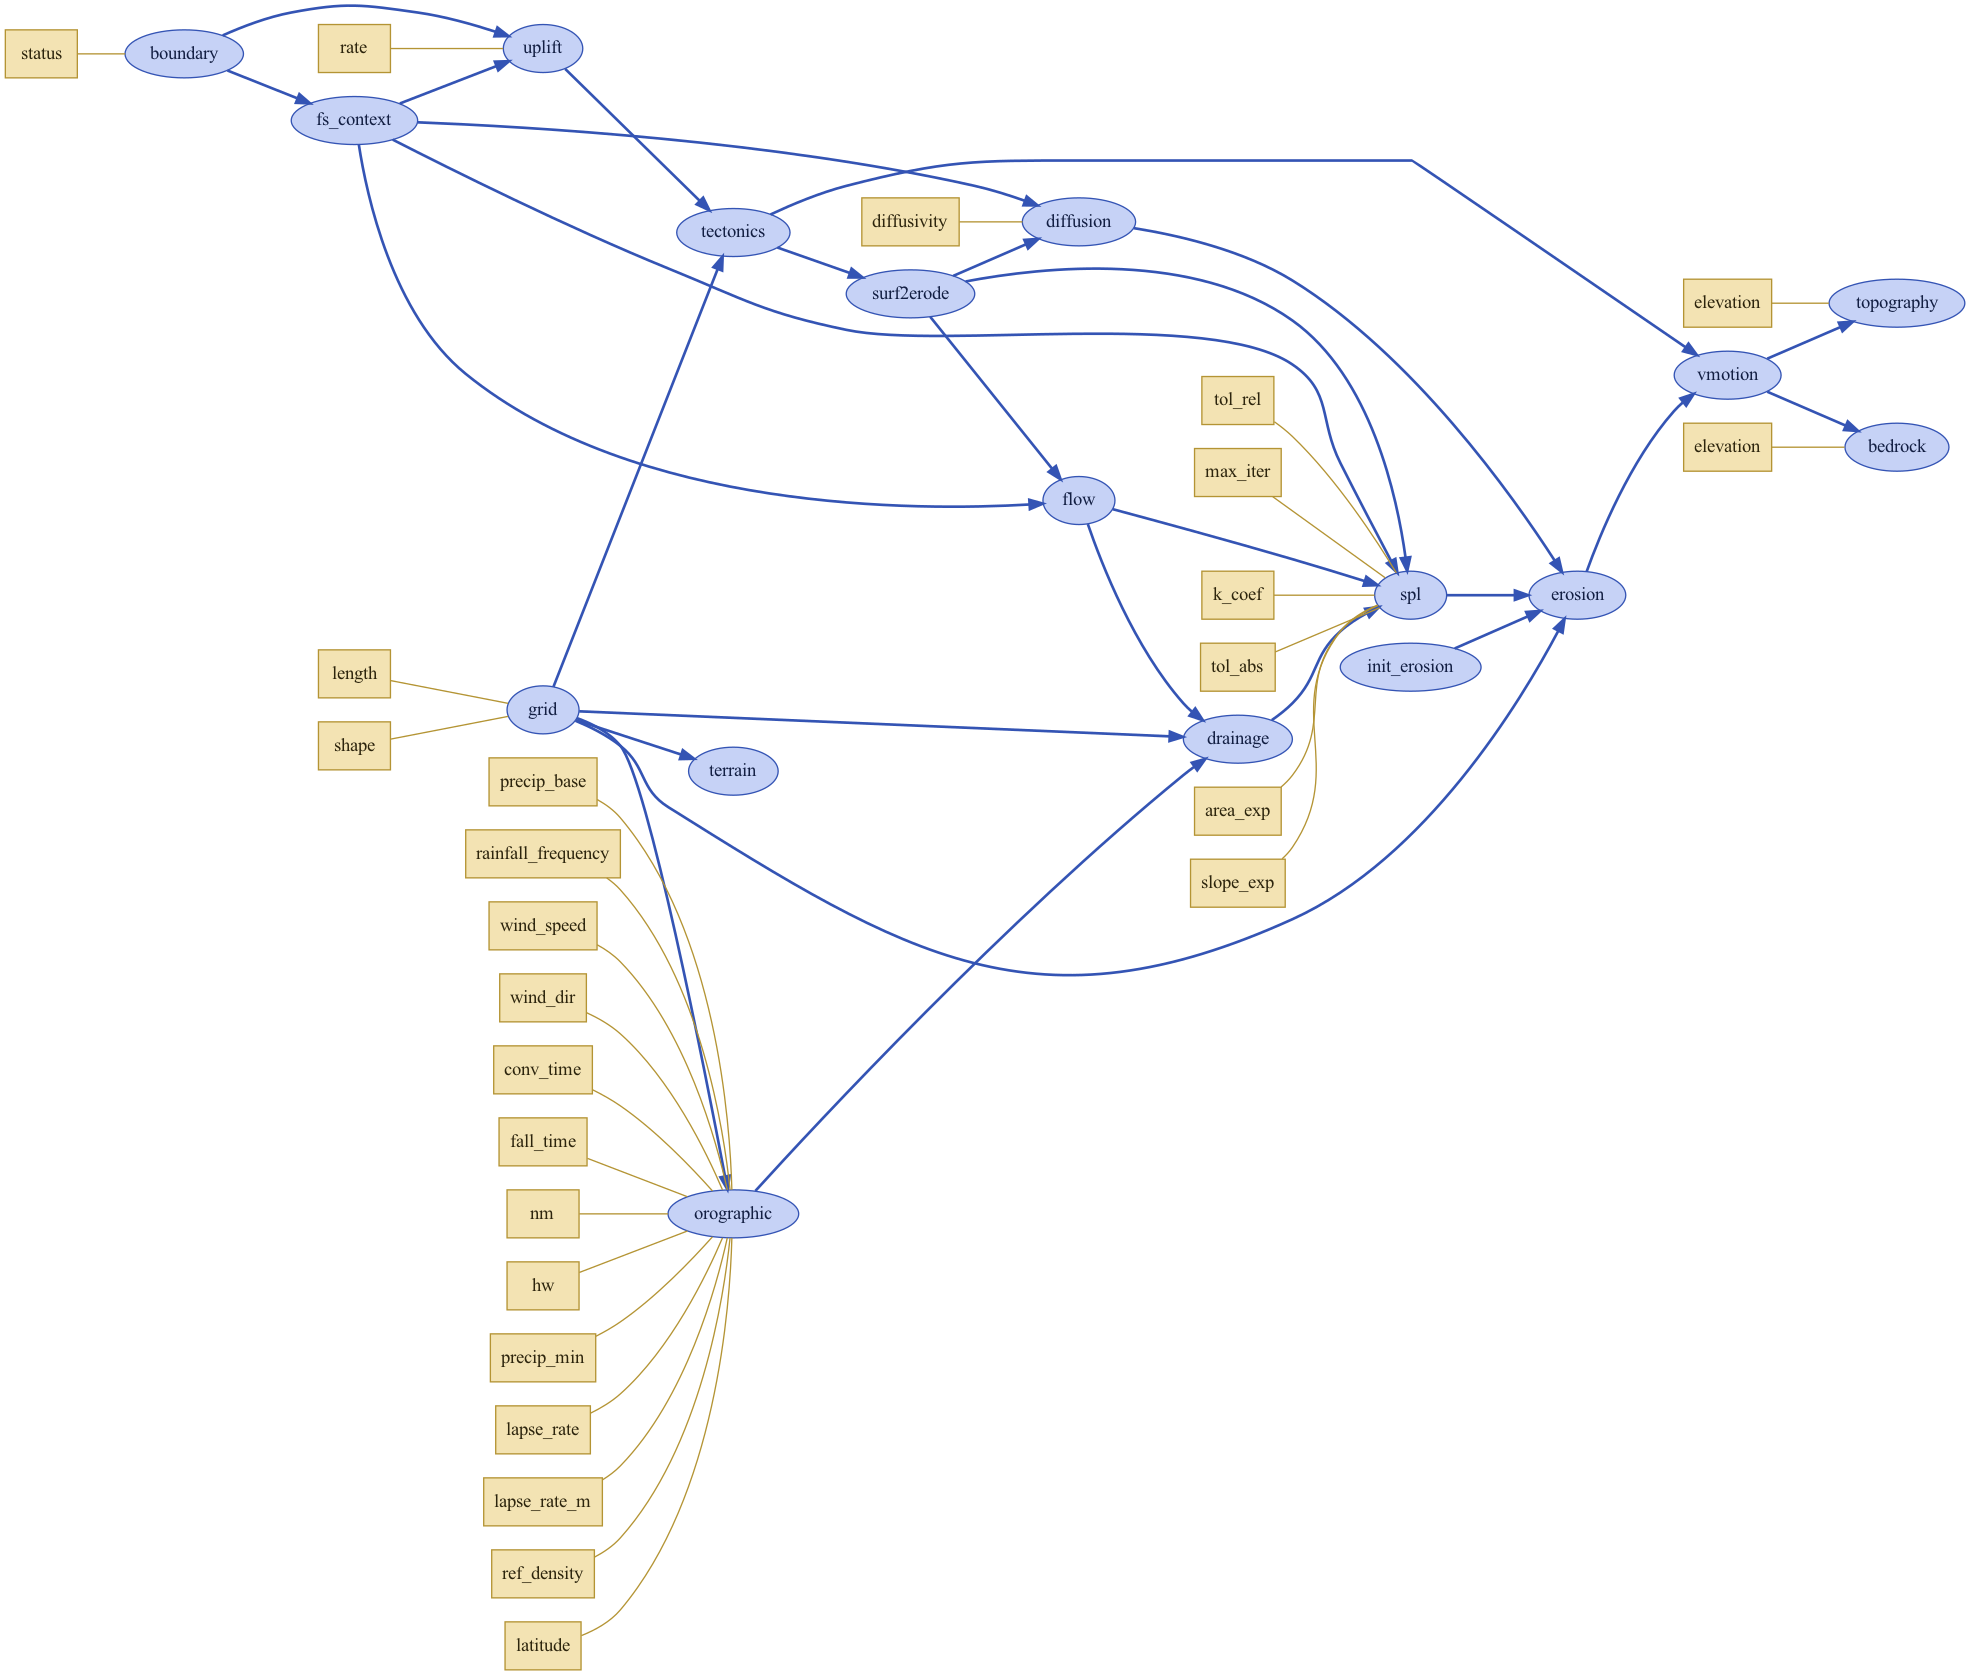

In [5]:
## Visualise xarray-simlab ##
SouthernAndesLEM.visualize(show_inputs='True')

In [28]:
## Model dimensions/grid dimensions ##
nx = 400
ny = 400
nn = nx * ny

xl = 400.e3
yl = 400.e3 

BoundaryCondition = ['fixed_value', 'core', 'fixed_value', 'core']

## Model time and time stepping ##
EndTime_1 = 5e6
EndTime_2 = 5e6
EndTime_3 = 8e6
TimeSteps_1 = 10001
TimeSteps_2 = 10001
TimeSteps_3 = 16001

# EndTime = 1e6
# TimeSteps = 1001
ModelTime_1 = np.linspace(0., EndTime_1, TimeSteps_1)
ModelTime_2 = np.linspace(0., EndTime_2, TimeSteps_2)
ModelTime_3 = np.linspace(0., EndTime_3, TimeSteps_3)

PlotStep = 100

## Tectonics ##
k_coef= 2.5e-5
area_exp = 0.4
slope_exp = 1.0
diffusion_diffusivity = 0.

## Background Precipitation ##
precip_base_arr = np.ones([400, 400])
precip_base_arr=precip_base_arr*5
xr_2d = xr.DataArray(np.ones((400,400)), dims=['y','x'])
precip_base_xr=xr_2d*5

## Orographic ##
lapse_rate = -5.8
lapse_rate_m = -6.5 
ref_density = 7.4e-3
rainfall_frequency = 150
latitude = 40
precip_base =  precip_base_xr
wind_speed = 3.5
wind_dir = 270
precip_min = 0.001
conv_time = 1000
fall_time = 1000
nm = 0.005
hw = 5000


## Initial topography ##
WhiteNoiseLevel = 50 # in [m], amplitude of noise

## Seed for Reproducibility ##
RandomSeed = 1410

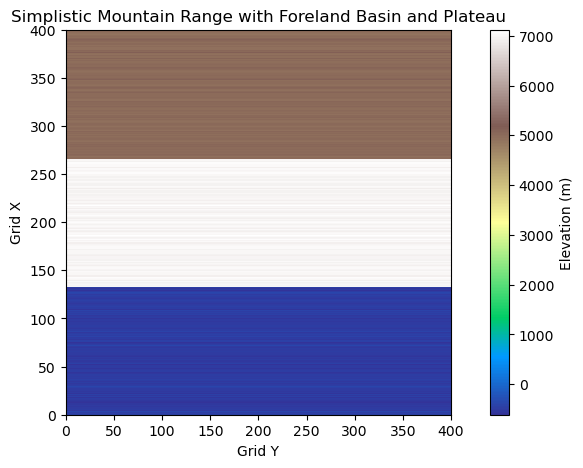

In [29]:
# Define elevation levels
ForelandBasinElevation = -500
MountainRangeElevation = 7000
PlateauElevation = 5000

# Create a synthetic topographic profile
x = np.linspace(0, nx - 1, nx)
TopographyProfile = np.zeros(nx)

# Define regions
ForelandBasinWidth = nx // 3
MountainRangeWidth = nx // 3
PlateauWidth = nx - ForelandBasinWidth - MountainRangeWidth

# Assign elevations to each region
TopographyProfile[:ForelandBasinWidth] = ForelandBasinElevation
TopographyProfile[ForelandBasinWidth:ForelandBasinWidth + MountainRangeWidth] = MountainRangeElevation
TopographyProfile[ForelandBasinWidth + MountainRangeWidth:] = PlateauElevation

# Add noise
np.random.seed(RandomSeed)
Noise = np.random.normal(0, WhiteNoiseLevel, nx)
TopographyProfile = TopographyProfile + Noise

# Expand the profile to a 2D grid
InitialTopography = np.tile(TopographyProfile, (ny, 1)).T

# Visualize the result
plt.figure(figsize=(10, 5))
plt.imshow(InitialTopography, cmap='terrain', origin='lower', extent=[0, ny, 0, nx])
plt.colorbar(label='Elevation (m)')
plt.title('Simplistic Mountain Range with Foreland Basin and Plateau')
plt.xlabel('Grid Y')
plt.ylabel('Grid X')
plt.show()


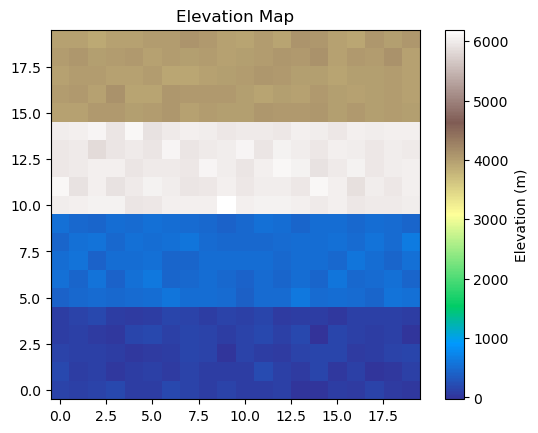

In [30]:
# Total number of nodes
nn = 400  # Example: 400 nodes
InitialTopography = np.zeros(nn)  # Initialize an array to store elevations

# Assign elevations based on node indices
for i in range(nn):
    if 0 <= i < 100:
        InitialTopography[i] = 100  # Elevation of 100 m for nodes 0-99
    elif 100 <= i < 200:
        InitialTopography[i] = 500  # Elevation of 500 m for nodes 100-199
    elif 200 <= i < 300:
        InitialTopography[i] = 6000  # Elevation of 6000 m for nodes 200-299
    elif 300 <= i < 400:
        InitialTopography[i] = 4000  # Elevation of 4000 m for nodes 300-399

# Assign elevations using slicing
InitialTopography[0:100] = 100    # Elevation of 100 m for nodes 0-99
InitialTopography[100:200] = 500  # Elevation of 500 m for nodes 100-199
InitialTopography[200:300] = 6000 # Elevation of 6000 m for nodes 200-299
InitialTopography[300:400] = 4000 # Elevation of 4000 m for nodes 300-399

# Assign elevations using slicing
InitialTopography[0:100] = 100    # Elevation of 100 m for nodes 0-99
InitialTopography[100:200] = 500  # Elevation of 500 m for nodes 100-199
InitialTopography[200:300] = 6000 # Elevation of 6000 m for nodes 200-299
InitialTopography[300:400] = 4000 # Elevation of 4000 m for nodes 300-399

# Adding random noise to the elevations
np.random.seed(42)  # For reproducibility
WhiteNoiseLevel = 50  # Standard deviation of noise

Noise = np.random.normal(0, WhiteNoiseLevel, nn)
InitialTopography += Noise  # Add noise to the elevations

# Reshape into a 2D grid for visualization
nx, ny = 20, 20  # Example: 20x20 grid
InitialTopography2D = InitialTopography.reshape(nx, ny)

# Plotting
import matplotlib.pyplot as plt
plt.imshow(InitialTopography2D, cmap='terrain', origin='lower')
plt.colorbar(label='Elevation (m)')
plt.title('Elevation Map')
plt.show()


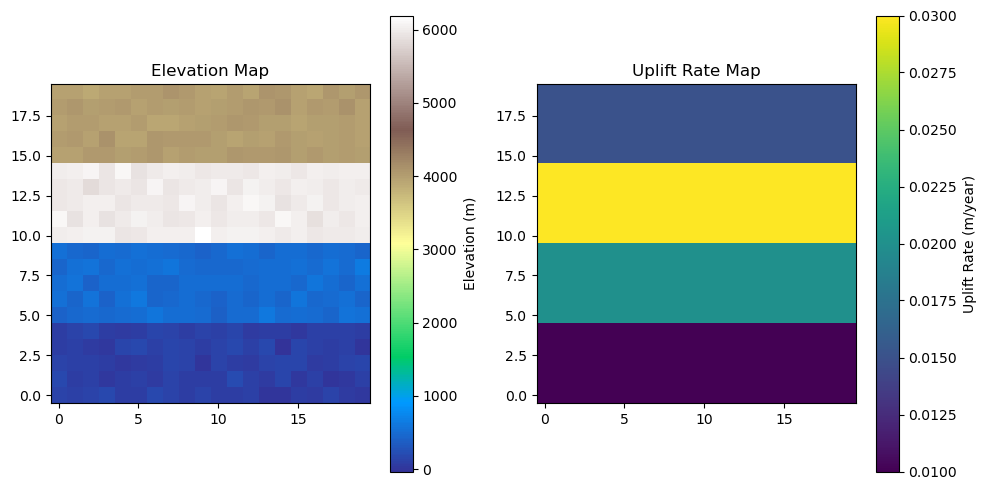

In [31]:
# Define first stage uplift rates for each region
UpliftRates = np.zeros(nn)  # Initialize uplift rates array
UpliftRates[0:100] = 0.01    # Uplift rate for nodes 0-99 (e.g., 0.01 m/year)
UpliftRates[100:200] = 0.02  # Uplift rate for nodes 100-199 (e.g., 0.02 m/year)
UpliftRates[200:300] = 0.03  # Uplift rate for nodes 200-299 (e.g., 0.03 m/year)
UpliftRates[300:400] = 0.015 # Uplift rate for nodes 300-399 (e.g., 0.015 m/year)

# Reshape into a 2D grid for visualization
nx, ny = 20, 20  # Example: 20x20 grid
InitialTopography2D = InitialTopography.reshape(nx, ny)
UpliftRates2D = UpliftRates.reshape(nx, ny)

# Plotting the elevation map
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(InitialTopography2D, cmap='terrain', origin='lower')
plt.colorbar(label='Elevation (m)')
plt.title('Elevation Map')

# Plotting the uplift rate map
plt.subplot(1, 2, 2)
plt.imshow(UpliftRates2D, cmap='viridis', origin='lower')
plt.colorbar(label='Uplift Rate (m/year)')
plt.title('Uplift Rate Map')

plt.tight_layout()
plt.show()

In [34]:
## Set up input parameters for xarray-simlab model ##
in_ds_S1 = xs.create_setup(
    model = SouthernAndesLEM,
    clocks={
        'time': ModelTime_1,
        'output': ModelTime_1[::PlotStep]
    },
    master_clock='time',
    input_vars={
        'grid': {
            'shape': [nx, ny],
            'length': [xl, yl],
        },
        'boundary': {
            'status': BoundaryCondition
        },
        'topography': {
            'elevation': InitialTopography,
        },
        'bedrock': {
            'elevation': InitialTopography,
        },
        'uplift': {
            'rate': UpliftRates,
        },
        'spl': {
            'k_coef': k_coef,
            'area_exp': area_exp,
            'slope_exp': slope_exp,
        },
        'diffusion': {
            'diffusivity': diffusion_diffusivity,
        },
        'orographic': {
            'lapse_rate': lapse_rate,
            'lapse_rate_m': lapse_rate_m,
            'ref_density': ref_density, 
            'rainfall_frequency': rainfall_frequency,
            'latitude': latitude,
            'precip_base': precip_base_xr,  
            'wind_speed': wind_speed,   
            'wind_dir': wind_dir,
            'precip_min': precip_min,  
            'conv_time': conv_time,            
            'fall_time': fall_time,         
            'nm': nm,                                
            'hw': hw,
        },
    },
    output_vars={
        'topography__elevation': 'time',
        'orographic__precip_rate': 'time'
    }
)
# Run the simulation
with precip_model, xs.monitoring.ProgressBar():
    ds_out = ds_in.xsimlab.run()

TypeError: Could not get dimension labels from model for variable 'topography__elevation' with value [ 1.24835708e+02  9.30867849e+01  1.32384427e+02  1.76151493e+02
  8.82923313e+01  8.82931522e+01  1.78960641e+02  1.38371736e+02
  7.65262807e+01  1.27128002e+02  7.68291154e+01  7.67135123e+01
  1.12098114e+02  4.33598777e+00  1.37541084e+01  7.18856235e+01
  4.93584440e+01  1.15712367e+02  5.45987962e+01  2.93848149e+01
  1.73282438e+02  8.87111850e+01  1.03376410e+02  2.87625907e+01
  7.27808638e+01  1.05546129e+02  4.24503211e+01  1.18784901e+02
  6.99680655e+01  8.54153125e+01  6.99146694e+01  1.92613909e+02
  9.93251388e+01  4.71144536e+01  1.41127246e+02  3.89578175e+01
  1.10443180e+02  2.01649381e+00  3.35906976e+01  1.09843062e+02
  1.36923329e+02  1.08568414e+02  9.42175859e+01  8.49448152e+01
  2.60739005e+01  6.40077896e+01  7.69680615e+01  1.52856111e+02
  1.17180914e+02  1.18479922e+01  1.16204198e+02  8.07458860e+01
  6.61539000e+01  1.30583814e+02  1.51549976e+02  1.46564006e+02
  5.80391238e+01  8.45393812e+01  1.16563172e+02  1.48777256e+02
  7.60412881e+01  9.07170512e+01  4.46832513e+01  4.01896688e+01
  1.40626291e+02  1.67812001e+02  9.63994939e+01  1.50176645e+02
  1.18081801e+02  6.77440123e+01  1.18069780e+02  1.76901828e+02
  9.82086980e+01  1.78232183e+02 -3.09872552e+01  1.41095125e+02
  1.04352353e+02  8.50496325e+01  1.04588039e+02  6.21554270e-01
  8.90164056e+01  1.17855629e+02  1.73894702e+02  7.40864891e+01
  5.95753199e+01  7.49121478e+01  1.45770106e+02  1.16437555e+02
  7.35119898e+01  1.25663372e+02  1.04853877e+02  1.48432250e+02
  6.48973453e+01  8.36168927e+01  8.03945923e+01  2.68242526e+01
  1.14806014e+02  1.13052764e+02  1.00255673e+02  8.82706433e+01
  4.29231463e+02  4.78967734e+02  4.82864274e+02  4.59886137e+02
  4.91935714e+02  5.20202543e+02  5.94309295e+02  5.08728891e+02
  5.12877520e+02  4.96277704e+02  4.04061439e+02  4.98674306e+02
  5.03011510e+02  6.23162106e+02  4.90381952e+02  5.15077367e+02
  4.98264412e+02  4.41566098e+02  5.57141141e+02  5.37596652e+02
  5.39551597e+02  4.54530627e+02  5.70139716e+02  4.29907447e+02
  5.29342855e+02  6.09522781e+02  4.50473184e+02  4.71685114e+02
  5.04982568e+02  4.74826217e+02  4.22466828e+02  5.03428149e+02
  4.46884814e+02  5.23679622e+02  4.54028788e+02  5.77496720e+02
  4.60837335e+02  4.83896924e+02  5.40675861e+02  4.38456784e+02
  5.11372997e+02  5.65357138e+02  4.19625838e+02  5.09231693e+02
  5.12994140e+02  5.39091144e+02  4.38152464e+02  4.33977169e+02
  5.26097078e+02  5.14849234e+02  5.12524643e+02  5.17322410e+02
  4.65998764e+02  5.11612685e+02  5.14653624e+02  4.64282429e+02
  5.93288726e+02  5.23691646e+02  4.40434825e+02  5.32827680e+02
  4.51265916e+02  5.39354230e+02  5.57929779e+02  4.58965884e+02
  5.48168806e+02  5.20639046e+02  5.41103008e+02  5.94839649e+02
  4.87730594e+02  4.62313192e+02  4.55524279e+02  4.59209486e+02
  4.96144915e+02  5.17057599e+02  5.13834540e+02  5.41359162e+02
  5.00650095e+02  5.72676704e+02  4.86767158e+02  6.36008458e+02
  5.31283367e+02  4.57142122e+02  4.46455375e+02  5.24123621e+02
  4.88826861e+02  5.35700025e+02  5.23661881e+02  4.96358554e+02
  4.57660314e+02  4.24257639e+02  4.77674252e+02  5.42819940e+02
  5.10704687e+02  4.37713061e+02  5.08659046e+02  5.19265869e+02
  4.55807128e+02  5.07686255e+02  5.02910436e+02  4.42851485e+02
  6.01788937e+03  6.02803923e+03  6.05415256e+03  6.05269010e+03
  5.93111653e+03  5.95310875e+03  6.02575176e+03  6.02568930e+03
  6.02575238e+03  6.19263657e+03  6.02854453e+03  6.05677828e+03
  6.04770009e+03  6.03256956e+03  5.98423654e+03  6.03794846e+03
  5.96135874e+03  5.98815907e+03  5.97573182e+03  6.00409371e+03
  6.11573293e+03  5.90663674e+03  6.03431301e+03  5.91936421e+03
  5.97640341e+03  6.05444753e+03  6.00321400e+03  5.94611276e+03
  5.96423481e+03  6.03397989e+03  5.96348167e+03  6.01082293e+03
  6.00227859e+03  5.96741998e+03  6.10719720e+03  6.03169595e+03
  5.89874287e+03  6.00932272e+03  5.96691068e+03  6.04262167e+03
  5.96037396e+03  5.99426318e+03  6.02524936e+03  6.04328776e+03
  5.93998518e+03  5.98327494e+03  5.97625273e+03  5.96733354e+03
  6.08827271e+03  6.02024909e+03  5.93695580e+03  6.04589310e+03
  6.10610781e+03  6.05162326e+03  5.92403150e+03  5.97578830e+03
  6.06334556e+03  5.96461653e+03  6.02219097e+03  6.03873170e+03
  5.95365348e+03  5.99702373e+03  5.83793663e+03  5.94878062e+03
  5.98737159e+03  5.93761084e+03  6.08162057e+03  5.92849293e+03
  5.97799778e+03  6.00653703e+03  6.07206366e+03  5.92820689e+03
  6.05815819e+03  6.00051165e+03  5.95092457e+03  6.02310517e+03
  6.00995298e+03  5.96998916e+03  6.00349010e+03  5.98073432e+03
  6.00567587e+03  6.03310653e+03  6.07930084e+03  5.93810923e+03
  6.10665167e+03  5.90239561e+03  5.99241075e+03  6.02941586e+03
  6.01404959e+03  5.96886502e+03  5.98959389e+03  5.97534995e+03
  5.97053176e+03  6.04248010e+03  6.01785077e+03  5.96535452e+03
  6.04497999e+03  6.01536498e+03  6.04064311e+03  6.03148144e+03
  3.95855025e+03  3.97199095e+03  4.03736468e+03  4.03051851e+03
  3.99895492e+03  4.00586637e+03  4.06388324e+03  3.97042143e+03
  4.02735487e+03  3.98989037e+03  3.98911594e+03  4.05493884e+03
  4.04127082e+03  4.04067548e+03  4.06527394e+03  4.00105019e+03
  4.03409765e+03  3.98448666e+03  4.01620832e+03  3.99349285e+03
  4.00484980e+03  4.02975785e+03  3.95908897e+03  4.10461936e+03
  3.94969913e+03  3.93929057e+03  4.05790554e+03  4.03958313e+03
  4.03120599e+03  4.03141728e+03  3.99938766e+03  3.95513728e+03
  4.00379023e+03  3.96614191e+03  4.04875599e+03  3.99264713e+03
  3.95872514e+03  3.98393071e+03  4.02064657e+03  3.97181377e+03
  3.95888898e+03  4.01218436e+03  4.01224833e+03  3.97465284e+03
  3.97644808e+03  4.01160250e+03  3.92759578e+03  3.92962681e+03
  3.96407779e+03  3.98932764e+03  4.01554538e+03  4.07376781e+03
  4.04288298e+03  3.99200307e+03  3.99904919e+03  3.94987353e+03
  3.99907434e+03  3.98556707e+03  4.01613593e+03  3.95863845e+03
  4.02596733e+03  4.07663695e+03  3.99456199e+03  4.02008559e+03
  4.03450720e+03  3.97993898e+03  4.01120462e+03  4.00062962e+03
  4.00488380e+03  3.96134951e+03  4.00122551e+03  4.02489991e+03
  4.07255718e+03  4.04796354e+03  4.10765912e+03  3.96163262e+03
  4.04361603e+03  4.00916710e+03  4.10949015e+03  3.95958509e+03
  3.95801391e+03  3.97003037e+03  3.89380521e+03  3.97371225e+03
  3.96204337e+03  4.00751969e+03  4.01708780e+03  4.09380854e+03
  4.04752119e+03  3.97115482e+03  3.95507927e+03  4.02459596e+03
  3.93398834e+03  4.09157294e+03  4.05897201e+03  3.97654122e+03
  3.91434327e+03  4.06769362e+03  3.99427301e+03  4.06189082e+03]